In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import time
import DNN
%matplotlib inline

### Load the data

In [152]:
details = json.loads(open("details.json", "r").read())
X_data_path = details['coin'] + "_" + details['prediction'] + "_data.csv"
Y_data_path = details['coin'] + "_" + details['prediction'] + "_data.csv"

X_data_raw = pd.read_csv(X_data_path)
Y_data_raw = pd.read_csv(Y_data_path)

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

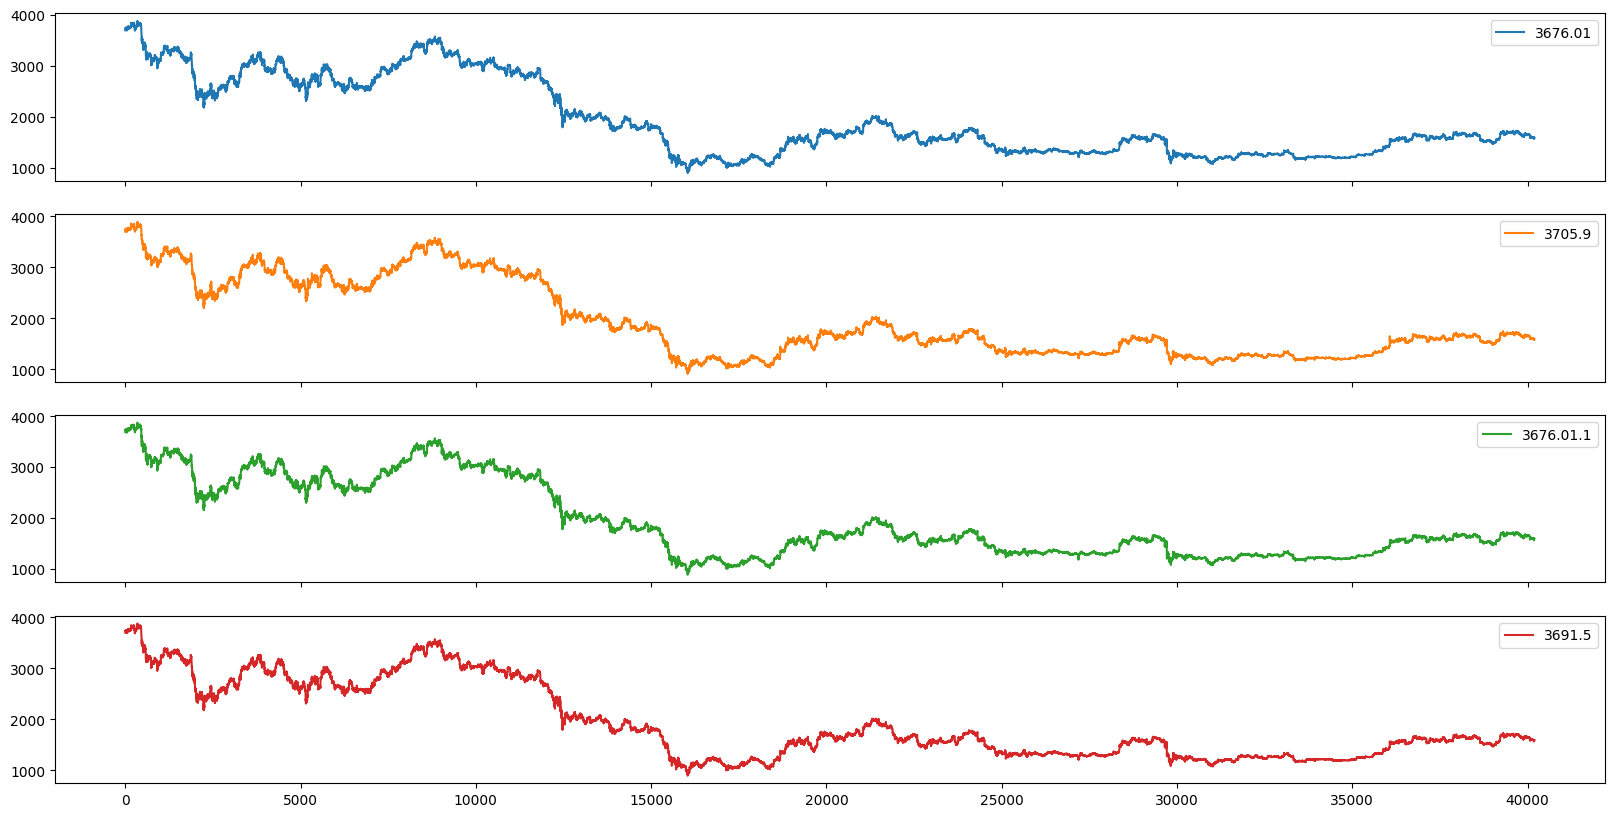

In [153]:
#get only columns: open,	high,	low,	close
X_data_raw = X_data_raw.iloc[:,2:6]
Y_data_raw = Y_data_raw.iloc[:,2:6]

#show data with each column is a different color
X_data_raw.plot(subplots=True, figsize=(20,10))


In [154]:
#to numpy 
X_data_raw = X_data_raw.to_numpy()
Y_data_raw = Y_data_raw.to_numpy()


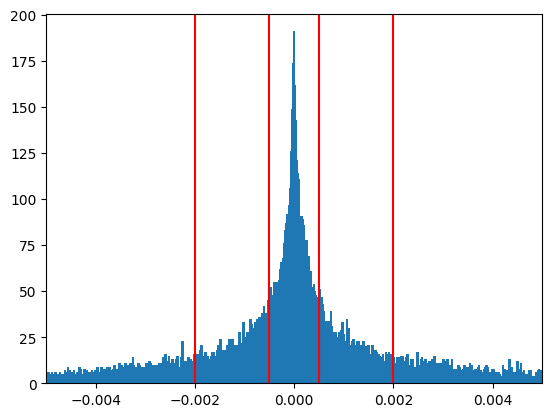

In [155]:
#normalize data
SCALE_FACTOR = .000005
THRESHOLDS = [-0.002,-0.0005, 0.0005, 0.002]
#Y label: open high low close
X_data = (X_data_raw[:,1] - X_data_raw[:,2]) * (X_data_raw[:,3] - X_data_raw[:,0])
Y_data = (Y_data_raw[:,1] - Y_data_raw[:,2]) * (Y_data_raw[:,3] - Y_data_raw[:,0])

#plot Y

#normalize Y to -1 to 1
Y_data = Y_data / np.max(np.abs(Y_data))


#plot histogram of the data
hist, bin_edges = np.histogram(Y_data, bins=np.arange(-SCALE_FACTOR*1000,SCALE_FACTOR*1000,SCALE_FACTOR))
plt.bar(bin_edges[:-1], hist, width = SCALE_FACTOR*10)
plt.xlim(min(bin_edges), max(bin_edges))

#draw thresholds
for threshold in THRESHOLDS:
    plt.axvline(x=threshold, color='r')

plt.show()






In [156]:

#classify Y based on thresholds
Y = np.digitize(Y_data, THRESHOLDS)
#create Y as one hot
Y = np.eye(len(THRESHOLDS)+1)[Y]


In [157]:

LAYERS = 10
#using X[0:10] to predict Y[11]
Y = Y[LAYERS:]
X = np.zeros((X_data.shape[0] - LAYERS , LAYERS)) #+1
for i in range(X_data.shape[0] - LAYERS ):

    X[i] = X_data[i:i+LAYERS ]



In [158]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [159]:
LEARNING_RATE = 0.0001
ITERATIONS = 20
#train the neural net with 256 
LAYERS = [512, 256, 256, 5]
ACTIVATION = [ "relu", "relu", "relu", "sigmoid"]

In [160]:
model = DNN.create_model(LAYERS,ACTIVATION)
parameters = DNN.train_model(model, X_train, y_train, X_test, y_test, epochs=ITERATIONS, batch_size=32)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

ValueError: in user code:

    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 20), found shape=(None, 10)


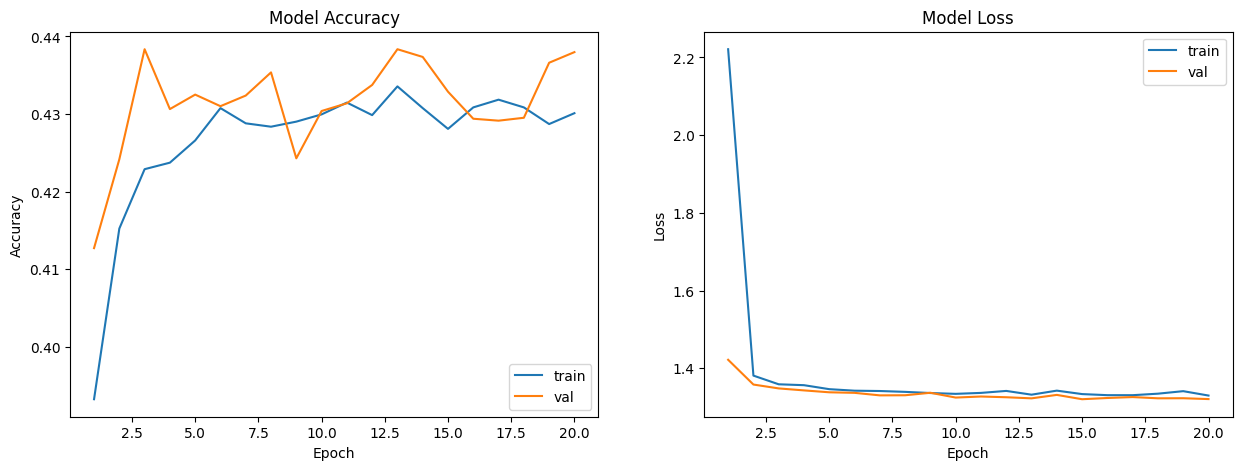

In [ ]:
DNN.plot_model_history(parameters)